In [1]:
!nvidia-smi

Thu May 18 07:59:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Setting

In [2]:
# pytorch 1.13+ CUDA 116 환경으로 Colab 커널 downgrade
!pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 712.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 70.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1+cu118
    Uninstalling torchvision-0.15.1+cu118:
      Successfully uninstalled torchvision-0.15.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.13.0+cu116 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.13.0+

In [3]:
!pip3 install openmim
!mim install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 6.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html, https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 18.1 MB/s eta 0:00:00


In [4]:
# mmdetection 2.x branch 로 설치
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 36110, done.
remote: Counting objects: 100% (761/761), done.
remote: Compressing objects: 100% (401/401), done.
remote: Total 36110 (delta 387), reused 622 (delta 351), pack-reused 35349
Receiving objects: 100% (36110/36110), 52.12 MiB | 12.60 MiB/s, done.
Resolving deltas: 100% (25322/25322), done.
Updating files: 100% (1535/1535), done.
/content/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


In [5]:
import mmdet
print(mmdet.__version__)

2.28.2


/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [6]:
!mim download mmdet --config yolov3_mobilenetv2_320_300e_coco --dest .

/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
processing yolov3_mobilenetv2_320_300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MiB 25.1 MB/s eta 0:00:00
Successfully downloaded yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth to /content/mmdetection
Successfully dumped yolov3_mobilenetv2_320_300e_coco.py to /content/mmdetection


In [7]:
from mmdet.apis import init_detector, inference_detector

config_file = 'yolov3_mobilenetv2_320_300e_coco.py'
checkpoint_file = 'yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cpu'
result = inference_detector(model, 'demo/demo.jpg')
len(result)

load checkpoint from local path: yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth


80

In [8]:
import os
import glob
import shutil
import pandas as pd
import mmcv
import matplotlib.pyplot as plt
import cv2

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset
from mmcv import Config

## Helmet dataset 다운로드

In [9]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# permmision warning 방지
!chmod 600 ~/.kaggle/kaggle.json

# download the data
!kaggle datasets download -d andrewmvd/hard-hat-detection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json
100% 1.22G/1.22G [01:06<00:00, 18.5MB/s]
100% 1.22G/1.22G [01:06<00:00, 19.9MB/s]


In [10]:
!mkdir hard-hat-detection
# unzip
!unzip -q hard-hat-detection.zip -d hard-hat-detection

**디렉토리 구조 보기**

In [11]:
# # install tree first
# !apt-get -q install tree

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 43.0 kB of archives.
After this operation, 115 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tree amd64 1.8.0-1 [43.0 kB]
Fetched 43.0 kB in 1s (43.0 kB/s)
Selecting previously unselected package tree.
(Reading database ... 122531 files and directories currently installed.)
Preparing to unpack .../tree_1.8.0-1_amd64.deb ...
Unpacking tree (1.8.0-1) ...
Setting up tree (1.8.0-1) ...
Processing triggers for man-db (2.9.1-1) ...


In [11]:
!pwd

/content/mmdetection


In [ ]:
# !tree ./hard-hat-detection/annotations

In [ ]:
# !tree ./hard-hat-detection/images

## MS-COCO 포맷으로 변환하기

In [12]:
!git clone https://github.com/yukkyo/voc2coco.git

Cloning into 'voc2coco'...
remote: Enumerating objects: 436, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 436 (delta 11), reused 19 (delta 6), pack-reused 409
Receiving objects: 100% (436/436), 216.32 KiB | 1.02 MiB/s, done.
Resolving deltas: 100% (387/387), done.


In [13]:
!cat /content/mmdetection/hard-hat-detection/annotations/hard_hat_workers0.xml


<annotation>
    <folder>images</folder>
    <filename>hard_hat_workers0.png</filename>
    <size>
        <width>416</width>
        <height>416</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>357</xmin>
            <ymin>116</ymin>
            <xmax>404</xmax>
            <ymax>175</ymax>
        </bndbox>
    </object>
    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>4</xmin>
            <ymin>146</ymin>
            <xmax>39</xmax>
            <ymax>184</ymax>
        </bndbox>
    </object>
    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
  

**1. Make labels.txt**

In [14]:
!grep -REoh '<name>.*</name>' /content/mmdetection/hard-hat-detection/annotations/ | sort | uniq

<name>head</name>
<name>helmet</name>
<name>person</name>


In [15]:
with open('hard-hat-detection/labels.txt', 'w') as f:
    f.write('head\n')
    f.write('helmet\n')
    f.write('person\n')

**2. Run script**

In [16]:
import glob
file_paths = glob.glob('hard-hat-detection/images/*.png')

In [17]:
file_paths[:2]

['hard-hat-detection/images/hard_hat_workers2488.png',
 'hard-hat-detection/images/hard_hat_workers2382.png']

In [18]:
file_path = file_paths[0]
file_path.rfind('/'), file_path.rfind('.')

(25, 46)

In [19]:
file_path[file_path.rfind('/')+1:file_path.rfind('.')]

'hard_hat_workers2488'

In [20]:
remove_ext = lambda x : x[x.rfind('/')+1:x.rfind('.')]

file_names = list(map(remove_ext, file_paths))

In [21]:
len(file_names)

5000

In [22]:
from sklearn.model_selection import train_test_split

train_file_name, test_file_name = train_test_split(file_names, test_size=0.2, random_state=42)
test_file_name, val_file_name = train_test_split(test_file_name, test_size=0.5, random_state=42)

len(train_file_name), len(val_file_name), len(test_file_name)

(4000, 500, 500)

In [23]:
train_file_name.sort()
val_file_name.sort()
test_file_name.sort()

In [24]:
import pandas as pd

pd.Series(train_file_name).to_csv('hard-hat-detection/train.txt', header=False, index=False, sep=' ')
pd.Series(val_file_name).to_csv('hard-hat-detection/val.txt', header=False, index=False, sep=' ')
pd.Series(test_file_name).to_csv('hard-hat-detection/test.txt', header=False, index=False, sep=' ')

In [25]:
%cd voc2coco

/content/mmdetection/voc2coco


In [26]:
!python voc2coco.py \
    --ann_dir ../hard-hat-detection/annotations \
    --ann_ids ../hard-hat-detection/train.txt \
    --labels ../hard-hat-detection/labels.txt \
    --output ../hard-hat-detection/train.json \
    --ext xml

!python voc2coco.py \
    --ann_dir ../hard-hat-detection/annotations \
    --ann_ids ../hard-hat-detection/val.txt \
    --labels ../hard-hat-detection/labels.txt \
    --output ../hard-hat-detection/val.json \
    --ext xml

!python voc2coco.py \
    --ann_dir ../hard-hat-detection/annotations \
    --ann_ids ../hard-hat-detection/test.txt \
    --labels ../hard-hat-detection/labels.txt \
    --output ../hard-hat-detection/test.json \
    --ext xml        

Start converting !
100% 4000/4000 [00:00<00:00, 6157.28it/s]
Start converting !
100% 500/500 [00:00<00:00, 6251.78it/s]
Start converting !
100% 500/500 [00:00<00:00, 6052.60it/s]


**MS-COCO 포맷으로 변환된 json 파일 확인**

In [27]:
!sudo apt-get install jq

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libjq1 libonig5
The following NEW packages will be installed:
  jq libjq1 libonig5
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 313 kB of archives.
After this operation, 1,062 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libonig5 amd64 6.9.4-1 [142 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 libjq1 amd64 1.6-1ubuntu0.20.04.1 [121 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 jq amd64 1.6-1ubuntu0.20.04.1 [50.2 kB]
Fetched 313 kB in 2s (194 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to frontend: Readline

In [29]:
!jq . ../hard-hat-detection/train.json > train_output.json

In [30]:
!head -100 train_output.json

{
  "images": [
    {
      "file_name": "hard_hat_workers0.png",
      "height": 416,
      "width": 416,
      "id": "hard_hat_workers0"
    },
    {
      "file_name": "hard_hat_workers10.png",
      "height": 416,
      "width": 416,
      "id": "hard_hat_workers10"
    },
    {
      "file_name": "hard_hat_workers100.png",
      "height": 415,
      "width": 416,
      "id": "hard_hat_workers100"
    },
    {
      "file_name": "hard_hat_workers1000.png",
      "height": 416,
      "width": 416,
      "id": "hard_hat_workers1000"
    },
    {
      "file_name": "hard_hat_workers1001.png",
      "height": 415,
      "width": 416,
      "id": "hard_hat_workers1001"
    },
    {
      "file_name": "hard_hat_workers1003.png",
      "height": 415,
      "width": 416,
      "id": "hard_hat_workers1003"
    },
    {
      "file_name": "hard_hat_workers1004.png",
      "height": 415,
      "width": 416,
      "id": "hard_hat_workers1004"
    },
    {
      "file_name": "hard_hat_workers10

In [31]:
!jq . ../hard-hat-detection/val.json > val_output.json

In [32]:
!grep -n 'hard_hat_workers3656' val_output.json

1798:      "file_name": "hard_hat_workers3656.png",
1801:      "id": "hard_hat_workers3656"
25623:      "image_id": "hard_hat_workers3656",
25638:      "image_id": "hard_hat_workers3656",
25653:      "image_id": "hard_hat_workers3656",
25668:      "image_id": "hard_hat_workers3656",


In [33]:
!sed -n '25623, 25668p' val_output.json

      "image_id": "hard_hat_workers3656",
      "id": 1508
    },
    {
      "area": 1848,
      "iscrowd": 0,
      "bbox": [
        271,
        56,
        44,
        42
      ],
      "category_id": 2,
      "ignore": 0,
      "segmentation": [],
      "image_id": "hard_hat_workers3656",
      "id": 1509
    },
    {
      "area": 1305,
      "iscrowd": 0,
      "bbox": [
        -1,
        108,
        29,
        45
      ],
      "category_id": 2,
      "ignore": 0,
      "segmentation": [],
      "image_id": "hard_hat_workers3656",
      "id": 1510
    },
    {
      "area": 1118,
      "iscrowd": 0,
      "bbox": [
        388,
        55,
        26,
        43
      ],
      "category_id": 2,
      "ignore": 0,
      "segmentation": [],
      "image_id": "hard_hat_workers3656",


In [34]:
%cd ../

/content/mmdetection


In [35]:
%pwd

'/content/mmdetection'

## 이미지 시각화

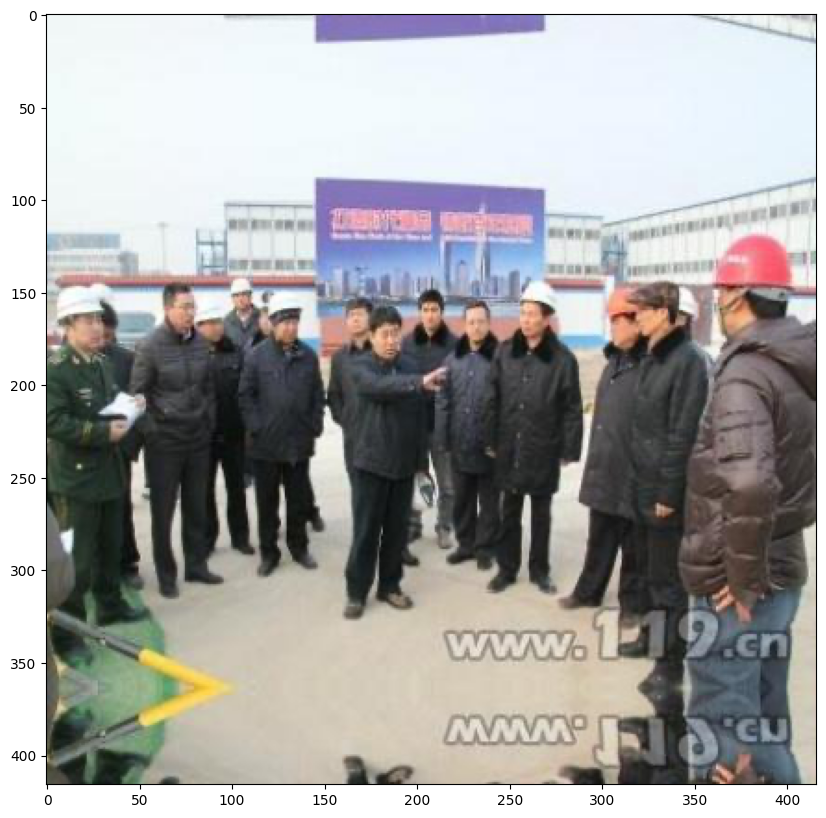

In [36]:
img = mmcv.imread('./hard-hat-detection/images/hard_hat_workers0.png')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [37]:
!cat ./hard-hat-detection/annotations/hard_hat_workers0.xml


<annotation>
    <folder>images</folder>
    <filename>hard_hat_workers0.png</filename>
    <size>
        <width>416</width>
        <height>416</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>357</xmin>
            <ymin>116</ymin>
            <xmax>404</xmax>
            <ymax>175</ymax>
        </bndbox>
    </object>
    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>4</xmin>
            <ymin>146</ymin>
            <xmax>39</xmax>
            <ymax>184</ymax>
        </bndbox>
    </object>
    <object>
        <name>helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
  

[{'class_name': 'helmet', 'bndbox_coor': (357, 116, 404, 175)}, {'class_name': 'helmet', 'bndbox_coor': (4, 146, 39, 184)}, {'class_name': 'helmet', 'bndbox_coor': (253, 139, 275, 177)}, {'class_name': 'helmet', 'bndbox_coor': (300, 145, 323, 181)}, {'class_name': 'helmet', 'bndbox_coor': (116, 151, 138, 180)}, {'class_name': 'helmet', 'bndbox_coor': (80, 151, 100, 180)}, {'class_name': 'head', 'bndbox_coor': (62, 144, 83, 172)}, {'class_name': 'head', 'bndbox_coor': (322, 141, 345, 178)}, {'class_name': 'head', 'bndbox_coor': (175, 156, 194, 186)}, {'class_name': 'head', 'bndbox_coor': (222, 151, 240, 182)}, {'class_name': 'head', 'bndbox_coor': (200, 146, 216, 173)}, {'class_name': 'helmet', 'bndbox_coor': (98, 140, 112, 160)}, {'class_name': 'head', 'bndbox_coor': (157, 150, 175, 177)}]


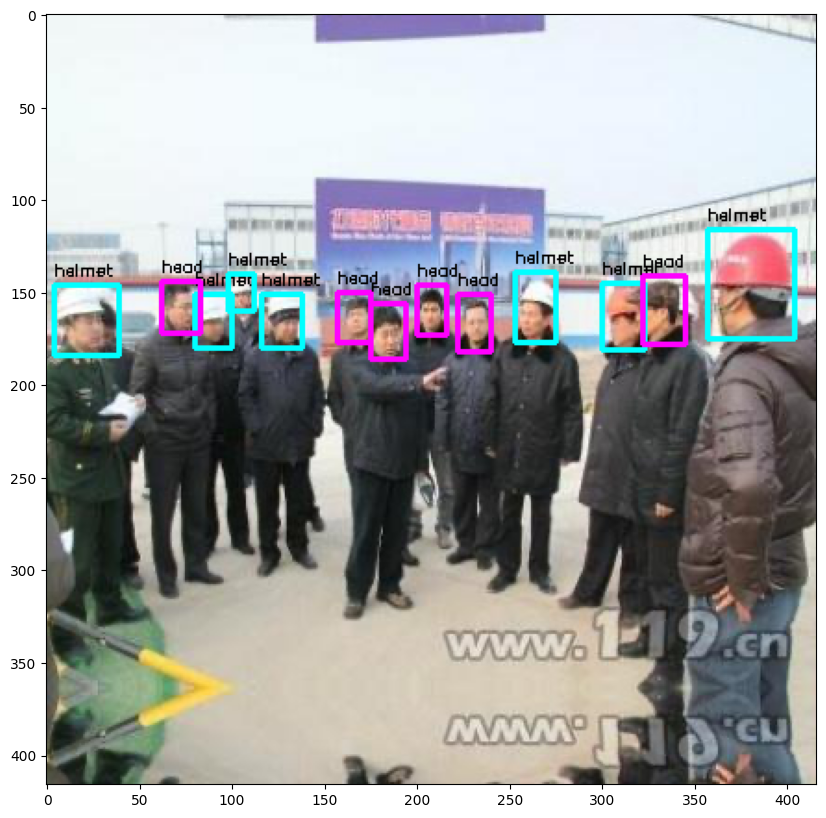

In [38]:
import os
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

img_dir = "./hard-hat-detection/images/"
xml_file = "./hard-hat-detection/annotations/hard_hat_workers0.xml"

class2color = {'helmet':(255, 255, 0), 'head':(255, 0, 255), 'person':(0, 255, 255)}

tree = ET.parse(xml_file)
root = tree.getroot()

img_path = root.find('filename').text
img_full_path = os.path.join(img_dir, img_path)
img = cv2.imread(img_full_path)
dst = img.copy()

objects = root.findall('object')
object_list = []

for obj in objects:
  box = obj.find("bndbox")
  x1 = int(box.find('xmin').text)
  y1 = int(box.find('ymin').text)
  x2 = int(box.find('xmax').text)
  y2 = int(box.find('ymax').text)

  bndbox_coor = (x1, y1, x2, y2)
  class_name = obj.find("name").text  
  
  cv2.rectangle(dst, (x1, y1), (x2, y2), color=class2color[class_name], thickness=2)
  cv2.putText(dst, class_name, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 0), thickness=1 )

  object_dict = {'class_name' : class_name, 'bndbox_coor' : bndbox_coor}
  object_list.append(object_dict)

print(object_list)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

## COCO포맷으로 변환

In [39]:
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset

@DATASETS.register_module(force=True) 
class HelmetDataset(CocoDataset):
    CLASSES = ('head', 'helmet', 'person')

## Config 파일 수정

In [47]:
from mmcv import Config
cfg = Config.fromfile('./configs/faster_rcnn/faster_rcnn_r101_fpn_1x_coco.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained',
                      checkpoint='torchvision://resnet101')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', 

**pretrained model 다운**

In [48]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r101_fpn_1x_coco/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth \
      -O checkpoints/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth

mkdir: cannot create directory ‘checkpoints’: File exists
--2023-05-18 08:21:48--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r101_fpn_1x_coco/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.82.217, 163.181.82.219, 163.181.82.215, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|163.181.82.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243515233 (232M) [application/octet-stream]
Saving to: ‘checkpoints/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth’

checkpoints/faster_ 100%[===================>] 232.23M  21.3MB/s    in 11s     

2023-05-18 08:21:59 (20.3 MB/s) - ‘checkpoints/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth’ saved [243515233/243515233]



In [43]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'HelmetDataset'
cfg.data_root = 'hard-hat-detection/'

cfg.data.test.type = 'HelmetDataset'
cfg.data.test.data_root = 'hard-hat-detection/'
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = 'images'

cfg.data.train.type = 'HelmetDataset'
cfg.data.train.data_root = 'hard-hat-detection/'
cfg.data.train.ann_file = 'train.json'
cfg.data.train.img_prefix = 'images'

cfg.data.val.type = 'HelmetDataset'
cfg.data.val.data_root = 'hard-hat-detection/'
cfg.data.val.ann_file = 'val.json'
cfg.data.val.img_prefix = 'images'

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 3
# If we need to finetune a model based on a pre-trained detector, we need to
# use load_from to set the path of checkpoints.
cfg.load_from = './checkpoints/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth'

# Set up working dir to save files and logs.
cfg.work_dir = '/content/drive/MyDrive/helmet_log'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02/8
# cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# max epochs 12 
cfg.runner.max_epochs = 4 # 기본값 변경시에만 설정

# 학습 시 Batch size 설정(단일 GPU 별 Batch size로 설정됨)
# samples_per_gpu 2 
# cfg.data.samples_per_gpu = 2 # 기본값 변경시에만설정


# CocoDataset의 경우 metric을 bbox로 설정해야 함.(mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
# Change the evaluation metric since we use customized dataset.
# cfg.evaluation.metric = 'bbox' 
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 4
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 4

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.device = 'cuda'
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained',
                      checkpoint='torchvision://resnet101')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', 

**Config에서 설정한 모델 적용**

In [50]:
from mmdet.datasets import build_dataset

train_dataset, test_dataset = [build_dataset(cfg.data.train), build_dataset(cfg.data.test)]

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
loading annotations into memory...
Done (t=0.17s)
creating index...
index created!


In [51]:
train_dataset


HelmetDataset Train dataset with number of images 4000, and instance counts: 
+----------+-------+------------+-------+------------+-------+----------+-------+----------+-------+
| category | count | category   | count | category   | count | category | count | category | count |
+----------+-------+------------+-------+------------+-------+----------+-------+----------+-------+
|          |       |            |       |            |       |          |       |          |       |
| 0 [head] | 4619  | 1 [helmet] | 15159 | 2 [person] | 589   |          |       |          |       |
+----------+-------+------------+-------+------------+-------+----------+-------+----------+-------+

In [52]:
test_dataset


HelmetDataset Train dataset with number of images 500, and instance counts: 
+----------+-------+------------+-------+------------+-------+----------+-------+----------+-------+
| category | count | category   | count | category   | count | category | count | category | count |
+----------+-------+------------+-------+------------+-------+----------+-------+----------+-------+
|          |       |            |       |            |       |          |       |          |       |
| 0 [head] | 569   | 1 [helmet] | 1871  | 2 [person] | 107   |          |       |          |       |
+----------+-------+------------+-------+------------+-------+----------+-------+----------+-------+

## 모델 학습

**모델 적용**

In [53]:
from mmdet.models import build_detector

# Build the detector
model = build_detector(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = train_dataset.CLASSES

**학습 수행**

In [54]:
from mmdet.apis import train_detector

# Create work_dir
mmcv.mkdir_or_exist(os.path.abspath(cfg.work_dir))
train_detector(model, train_dataset, cfg, distributed=False, validate=True) 

2023-05-18 08:22:56,381 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2023-05-18 08:22:56,412 - mmdet - INFO - load checkpoint from local path: ./checkpoints/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


2023-05-18 08:22:56,724 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([4]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([12, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([12]).
2023-05-18 08:22:56,742 - mmdet - INFO - Start running, host: root@2d33b9fb9985, work_dir: /content/drive/MyDrive/helmet_log
2023-05-18 08:22:56,748 - mmdet - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 500/500, 7.5 task/s, elapsed: 66s, ETA:     0s

2023-05-18 09:45:06,300 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2023-05-18 09:45:07,852 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.370
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.607
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.413
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.309
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.437
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.335
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.485
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.485
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.485
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.359
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.516
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=1.33s).
Accumulating evaluation results...
DONE (t=0.17s).


## 모델 예측

**한 장 예측**

/content/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


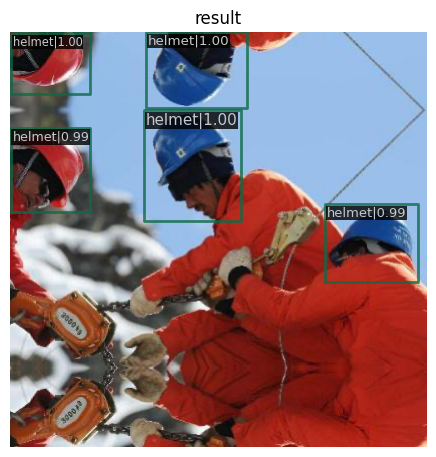

In [55]:
from mmdet.apis import show_result_pyplot

img = mmcv.imread('./hard-hat-detection/images/hard_hat_workers100.png')

model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.4)

load checkpoint from local path: /content/drive/MyDrive/helmet_log/epoch_4.pth


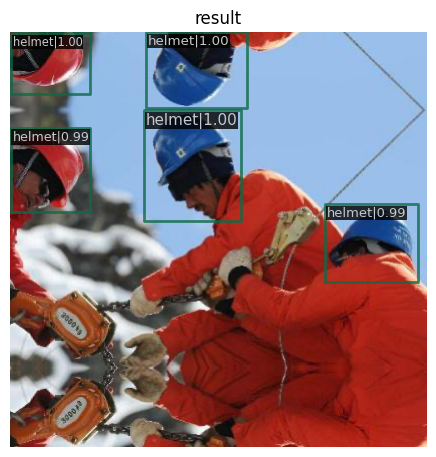

In [56]:
checkpoint_file = '/content/drive/MyDrive/helmet_log/epoch_4.pth'

model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')
result = inference_detector(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, score_thr=0.4)

**여러 장 예측**

In [57]:
import pandas as pd

test_df = pd.read_csv('./hard-hat-detection/test.txt', header=None,
            names=['image_name'])
test_df.head()

image_name
0     hard_hat_workers1
1  hard_hat_workers1002
2  hard_hat_workers1006
3  hard_hat_workers1012
4  hard_hat_workers1024

In [60]:
test_img_paths = './hard-hat-detection/images/' + test_df['image_name'] + '.png'
test_img_paths

0      ./hard-hat-detection/images/hard_hat_workers1.png
1      ./hard-hat-detection/images/hard_hat_workers10...
2      ./hard-hat-detection/images/hard_hat_workers10...
3      ./hard-hat-detection/images/hard_hat_workers10...
4      ./hard-hat-detection/images/hard_hat_workers10...
                             ...                        
495    ./hard-hat-detection/images/hard_hat_workers93...
496    ./hard-hat-detection/images/hard_hat_workers95...
497    ./hard-hat-detection/images/hard_hat_workers95...
498    ./hard-hat-detection/images/hard_hat_workers96...
499    ./hard-hat-detection/images/hard_hat_workers96...
Name: image_name, Length: 500, dtype: object

In [61]:
test_imgs = [mmcv.imread(img_path) for img_path in test_img_paths.values]
len(test_imgs), test_imgs[0].shape

(500, (416, 416, 3))

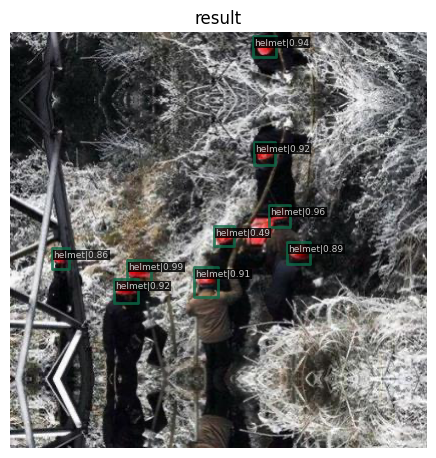

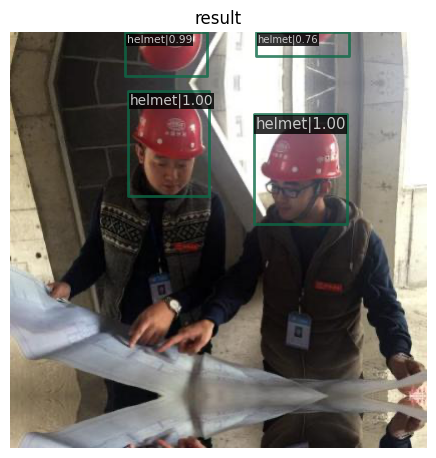

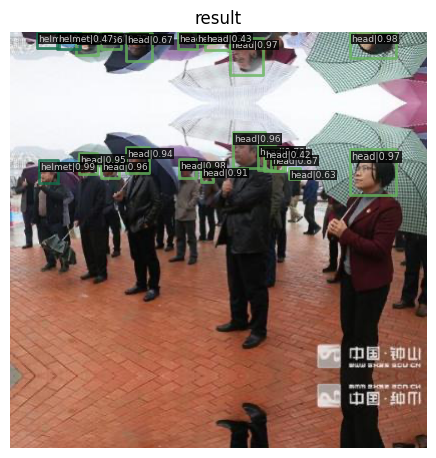

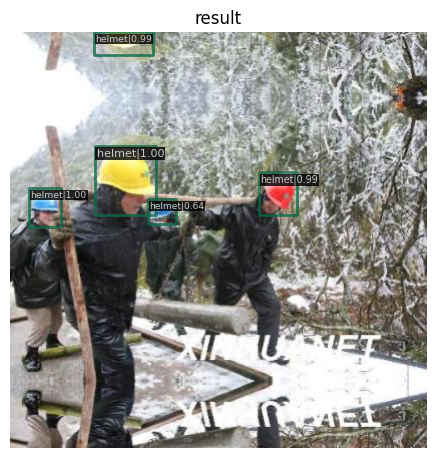

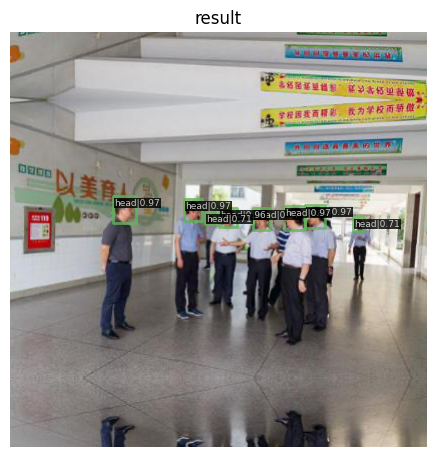

In [62]:
for i in range(5):
    result = inference_detector(model_ckpt, test_imgs[i])
    show_result_pyplot(model_ckpt, test_imgs[i], result, score_thr=0.4)

## 모델 평가

In [63]:
from mmdet.datasets import build_dataloader, build_dataset

data_loader = build_dataloader(
        test_dataset,
        samples_per_gpu=1, #cfg.data.samples_per_gpu,
        workers_per_gpu=cfg.data.workers_per_gpu,
        dist=False,
        shuffle=False)

next(iter(data_loader))

{'img_metas': [DataContainer([[{'filename': 'hard-hat-detection/images/hard_hat_workers1.png', 'ori_filename': 'hard_hat_workers1.png', 'ori_shape': (416, 416, 3), 'img_shape': (800, 800, 3), 'pad_shape': (800, 800, 3), 'scale_factor': array([1.9230769, 1.9230769, 1.9230769, 1.9230769], dtype=float32), 'flip': False, 'flip_direction': None, 'img_norm_cfg': {'mean': array([123.675, 116.28 , 103.53 ], dtype=float32), 'std': array([58.395, 57.12 , 57.375], dtype=float32), 'to_rgb': True}}]])],
 'img': [tensor([[[[1.0331, 0.8447, 0.5193,  ..., 0.9646, 0.7591, 0.6392],
            [1.0844, 0.9303, 0.6221,  ..., 0.9817, 0.8618, 0.7933],
            [1.1872, 1.0673, 0.8276,  ..., 1.0159, 1.0502, 1.0673],
            ...,
            [0.4166, 0.3309, 0.1768,  ..., 1.3584, 1.0673, 0.8961],
            [0.6906, 0.5022, 0.1426,  ..., 1.3927, 1.1529, 1.0159],
            [0.8447, 0.5878, 0.1083,  ..., 1.4098, 1.2043, 1.0844]],
  
           [[1.1681, 0.9755, 0.6429,  ..., 1.1681, 0.9580, 0.8354],


In [64]:
!mkdir show_test_output

In [65]:
from mmdet.apis import single_gpu_test
from mmdet.utils import build_dp

# 위에서 만든 /content/show_test_output 디렉토리에 예측 이미지가 저장됨. 
model_ckpt = build_dp(model_ckpt, cfg.device, device_ids=cfg.gpu_ids)
results = single_gpu_test(model_ckpt, data_loader, True, '/content/show_test_output', 0.4)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 500/500, 4.5 task/s, elapsed: 112s, ETA:     0s

In [66]:
metric = test_dataset.evaluate(results, metric='bbox')
metric


Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.92s).
Accumulating evaluation results...
DONE (t=0.18s).

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.359
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.603
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.390
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.303
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.431
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.425
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.476
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.476
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.476
 Average Recall     (AR) @[ IoU=0.50:0.95

OrderedDict([('bbox_mAP', 0.3589),
             ('bbox_mAP_50', 0.6035),
             ('bbox_mAP_75', 0.3899),
             ('bbox_mAP_s', 0.3032),
             ('bbox_mAP_m', 0.4311),
             ('bbox_mAP_l', 0.4255),
             ('bbox_mAP_copypaste',
              '0.3589 0.6035 0.3899 0.3032 0.4311 0.4255')])